**The district file includes information about the characteristics of school districts, 
including data from NCES (2018-19), FCC (Dec 2018), and Edunomics Lab.**

* district_id -	The unique identifier of the school district
* state - The state where the district resides in
* locale - NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and * Rural. See Locale Boundaries User's Manual for more information.
* pct_black/hispanic - Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data
* pct_free/reduced - Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data
* county_connections_ratio	ratio - (residential fixed high-speed connections over 200 kbps in at least one direction/households) based on the county level data from FCC From 477 (December 2018 version). See FCC data for more information.
* pp_total_raw - Per-pupil total expenditure (sum of local and federal expenditure) from Edunomics Lab's National Education Resource Database on Schools (NERD) project. The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set()

In [2]:
# Reading the data
raw_data = pd.read_csv('districts_info.csv')

In [3]:
raw_data

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [4]:
# Making a copy of raw data for further processing
df = raw_data.copy()

In [5]:
df.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [7]:
# Checking for missing values
df.isna().sum()

district_id                   0
state                        57
locale                       57
pct_black/hispanic           57
pct_free/reduced             85
county_connections_ratio     71
pp_total_raw                115
dtype: int64

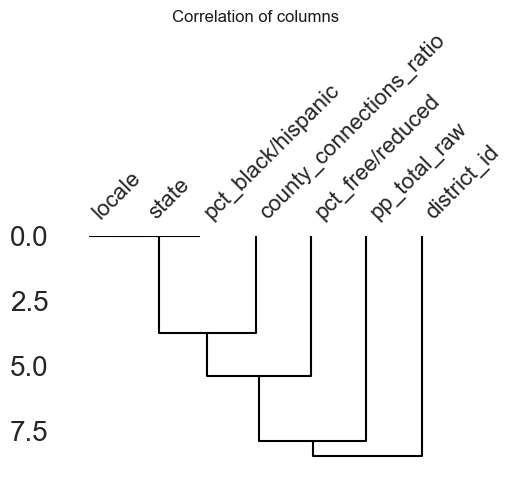

In [8]:
# Checking correlation of columns
msno.dendrogram(df, figsize=(5,3))
plt.title("Correlation of columns", color="k");

**Missingness are highly correlated, we can drop records containing NaNs in locale, state**

In [9]:
df = df.dropna(subset=['locale','state'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               176 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.0+ KB


## Distribution based on locale

In [11]:
df['locale'].unique()

array(['Suburb', 'Rural', 'City', 'Town'], dtype=object)

<AxesSubplot:xlabel='locale', ylabel='count'>

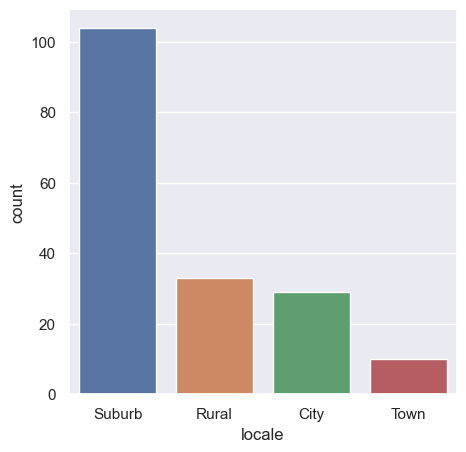

In [12]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x='locale')

**Most of the schools offering digital learnings are in suburbs**

## Distribution based on state

In [13]:
df['state'].unique()

array(['Illinois', 'Utah', 'Wisconsin', 'North Carolina', 'Missouri',
       'Washington', 'Connecticut', 'Massachusetts', 'New York',
       'Indiana', 'Virginia', 'Ohio', 'New Jersey', 'California',
       'District Of Columbia', 'Minnesota', 'Arizona', 'Texas',
       'Tennessee', 'Florida', 'North Dakota', 'New Hampshire',
       'Michigan'], dtype=object)

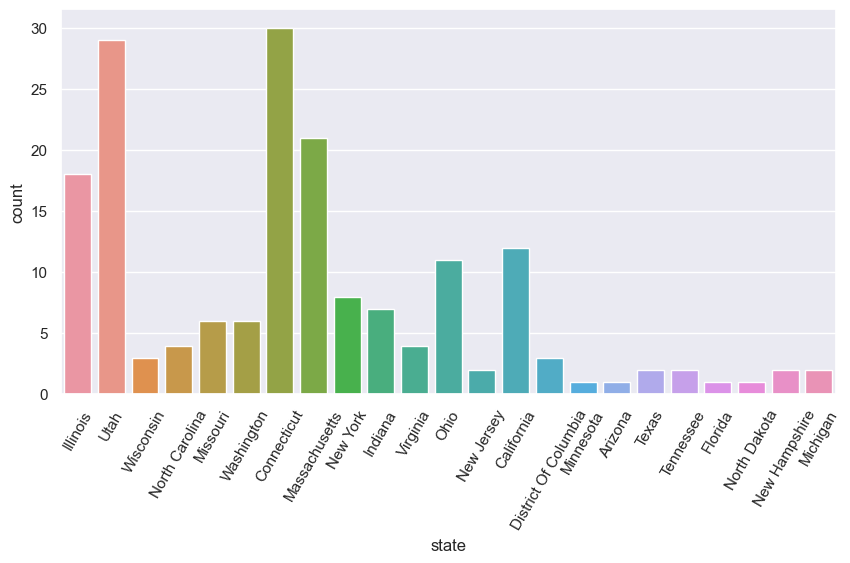

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='state')
plt.xticks(rotation =60)
plt.show()

**Connecticut has the most number of schools followed by Utah**

## Distribution based on state & locale

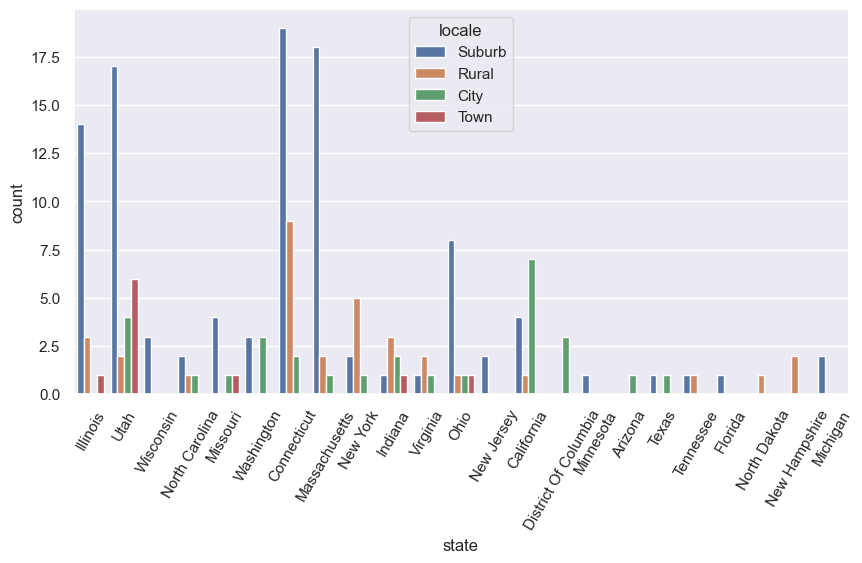

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='state',hue='locale')
plt.xticks(rotation =60)
plt.show()

* There are 23 States and 4 locale type
* Connecticut has the highest frequency
* Suburb is the highest frequency of locale type while Town is the other way

In [16]:
df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [17]:
df = df.dropna()
df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
5,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
6,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
7,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["
...,...,...,...,...,...,...,...
220,3732,Michigan,Suburb,"[0.4, 0.6[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
224,3266,Utah,Town,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[10000, 12000["
227,1705,Washington,City,"[0.2, 0.4[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["


## Further cleaning data

In [18]:
df['pct_black/hispanic']= df['pct_black/hispanic'].apply(lambda x : float(x.split(',')[0][1:])+0.1)
df['pct_free/reduced']= df['pct_free/reduced'].apply(lambda x : float(x.split(',')[0][1:])+0.1)
df['county_connections_ratio']= df['county_connections_ratio'].apply(lambda x : float(x.split(',')[0][1:])+0.1)
df['pp_total_raw']=df['pp_total_raw'].apply(lambda x : float(x.split(',')[0][1:])+1000)

C:\Users\SUNITA\AppData\Local\Temp\ipykernel_22568\1059814152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_black/hispanic']= df['pct_black/hispanic'].apply(lambda x : float(x.split(',')[0][1:])+0.1)
C:\Users\SUNITA\AppData\Local\Temp\ipykernel_22568\1059814152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pct_free/reduced']= df['pct_free/reduced'].apply(lambda x : float(x.split(',')[0][1:])+0.1)
C:\Users\SUNITA\AppData\Local\Temp\ipykernel_22568\1059814152.py:3: SettingWithCopyWarni

In [19]:
df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,0.28,15000.0
2,4921,Utah,Suburb,0.1,0.3,0.28,7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,0.28,11000.0
6,3710,Utah,Suburb,0.1,0.5,0.28,7000.0
7,7177,North Carolina,Suburb,0.3,0.3,0.28,9000.0
...,...,...,...,...,...,...,...
220,3732,Michigan,Suburb,0.5,0.5,0.28,13000.0
224,3266,Utah,Town,0.1,0.5,0.28,11000.0
227,1705,Washington,City,0.3,0.5,0.28,13000.0
228,9515,New York,Rural,0.1,0.5,0.28,19000.0


In [20]:
df['county_connections_ratio'].unique()

array([0.28])

**Dropping the column as its unnecessary**

In [21]:
df = df.drop(['county_connections_ratio'], axis=1)

In [22]:
df

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,8815,Illinois,Suburb,0.1,0.1,15000.0
2,4921,Utah,Suburb,0.1,0.3,7000.0
5,5987,Wisconsin,Suburb,0.1,0.1,11000.0
6,3710,Utah,Suburb,0.1,0.5,7000.0
7,7177,North Carolina,Suburb,0.3,0.3,9000.0
...,...,...,...,...,...,...
220,3732,Michigan,Suburb,0.5,0.5,13000.0
224,3266,Utah,Town,0.1,0.5,11000.0
227,1705,Washington,City,0.3,0.5,13000.0
228,9515,New York,Rural,0.1,0.5,19000.0


In [23]:
df_new = df.reset_index()
df_new

,index,district_id,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,0,8815,Illinois,Suburb,0.1,0.1,15000.0
1,2,4921,Utah,Suburb,0.1,0.3,7000.0
2,5,5987,Wisconsin,Suburb,0.1,0.1,11000.0
3,6,3710,Utah,Suburb,0.1,0.5,7000.0
4,7,7177,North Carolina,Suburb,0.3,0.3,9000.0
...,...,...,...,...,...,...,...
83,220,3732,Michigan,Suburb,0.5,0.5,13000.0
84,224,3266,Utah,Town,0.1,0.5,11000.0
85,227,1705,Washington,City,0.3,0.5,13000.0
86,228,9515,New York,Rural,0.1,0.5,19000.0


## Distribution of students elgible for free education according to state

In [46]:
state_pct = df_new.groupby(['state'], as_index=False).agg({'pct_black/hispanic':np.mean,
                                                    'pct_free/reduced':np.mean,
                                                    'pp_total_raw':np.mean})
                                                    
state_pct

,state,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,Florida,0.500000,0.500000,7000.000000
1,Illinois,0.311111,0.355556,13555.555556
2,Indiana,0.357143,0.614286,9000.000000
3,Michigan,0.500000,0.600000,12000.000000
4,Minnesota,0.500000,0.700000,15000.000000
5,Missouri,0.100000,0.340000,9400.000000
6,New Jersey,0.100000,0.100000,17000.000000
7,New York,0.100000,0.380000,21800.000000
8,North Carolina,0.400000,0.500000,9500.000000
9,Texas,0.600000,0.500000,9000.000000


In [47]:
state_pct.columns

Index(['state', 'pct_black/hispanic', 'pct_free/reduced', 'pp_total_raw'], dtype='object')

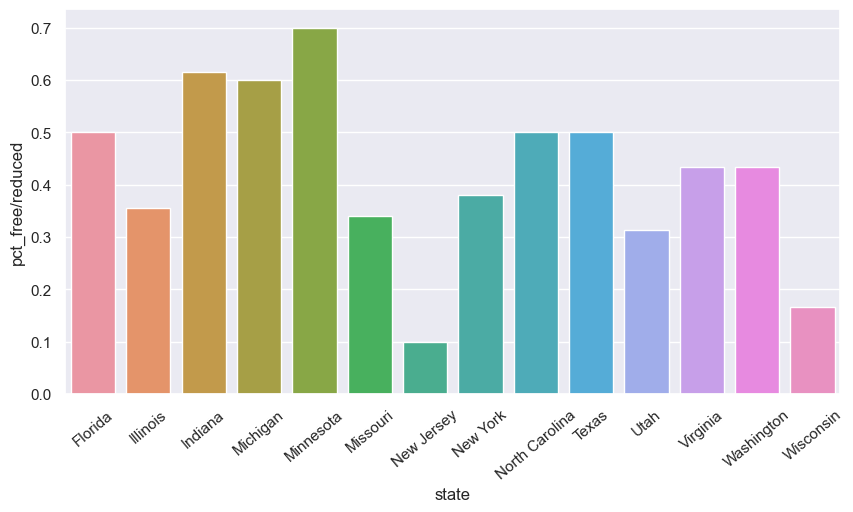

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data = state_pct, x='state',y = 'pct_free/reduced')
plt.xticks(rotation=40)
plt.show()

**Minnesota has more students eligible for free education**

## Distribution of expenditure according to State and locale

In [49]:
state_locale_pct = df_new.groupby(['state','locale'], as_index=False).agg({'pct_black/hispanic':np.mean,
                                                                     'pct_free/reduced':np.mean,
                                                                    'pp_total_raw':np.mean})
                                                    
state_locale_pct

,state,locale,pct_black/hispanic,pct_free/reduced,pp_total_raw
0,Florida,Suburb,0.500000,0.500000,7000.000000
1,Illinois,Rural,0.100000,0.100000,12333.333333
2,Illinois,Suburb,0.357143,0.371429,14000.000000
3,Illinois,Town,0.300000,0.900000,11000.000000
4,Indiana,City,0.600000,0.800000,9000.000000
5,Indiana,Rural,0.100000,0.500000,9000.000000
6,Indiana,Suburb,0.900000,0.700000,9000.000000
7,Indiana,Town,0.100000,0.500000,9000.000000
8,Michigan,Suburb,0.500000,0.600000,12000.000000
9,Minnesota,Suburb,0.500000,0.700000,15000.000000


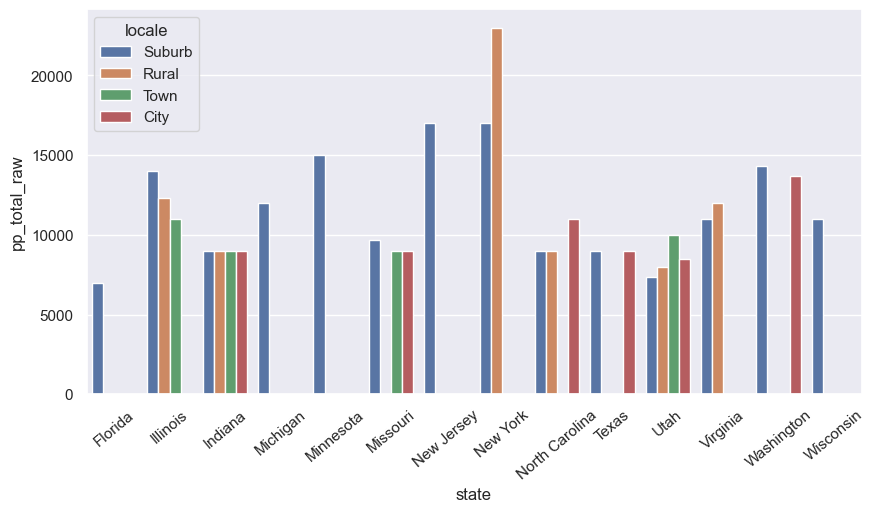

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(data = state_locale_pct, x='state',y = 'pp_total_raw',hue='locale')
plt.xticks(rotation=40)
plt.show()

**Edunomics Lab's National Education Resource has most expenditure for New York and that too in rural areas**